In [1]:
import nibabel as nib
import cortex
from collections import defaultdict

In [2]:
subject, xfm = 'AHfs', '20180816AH-sg'

In [3]:
lab_l,ctab_l,names_l = nib.freesurfer.read_annot('%s/label/lh.aparc.annot' % subject)
print(lab_l.shape, ctab_l.shape, len(names_l))

lab_r,ctab_r,names_r = nib.freesurfer.read_annot('%s/label/rh.aparc.annot' % subject)
print(lab_r.shape, ctab_r.shape, len(names_r))

assert np.all(names_l == names_r)
names = [n.decode("utf-8") for n in names_l]

FileNotFoundError: [Errno 2] No such file or directory: 'AHfs/label/lh.aparc.annot'

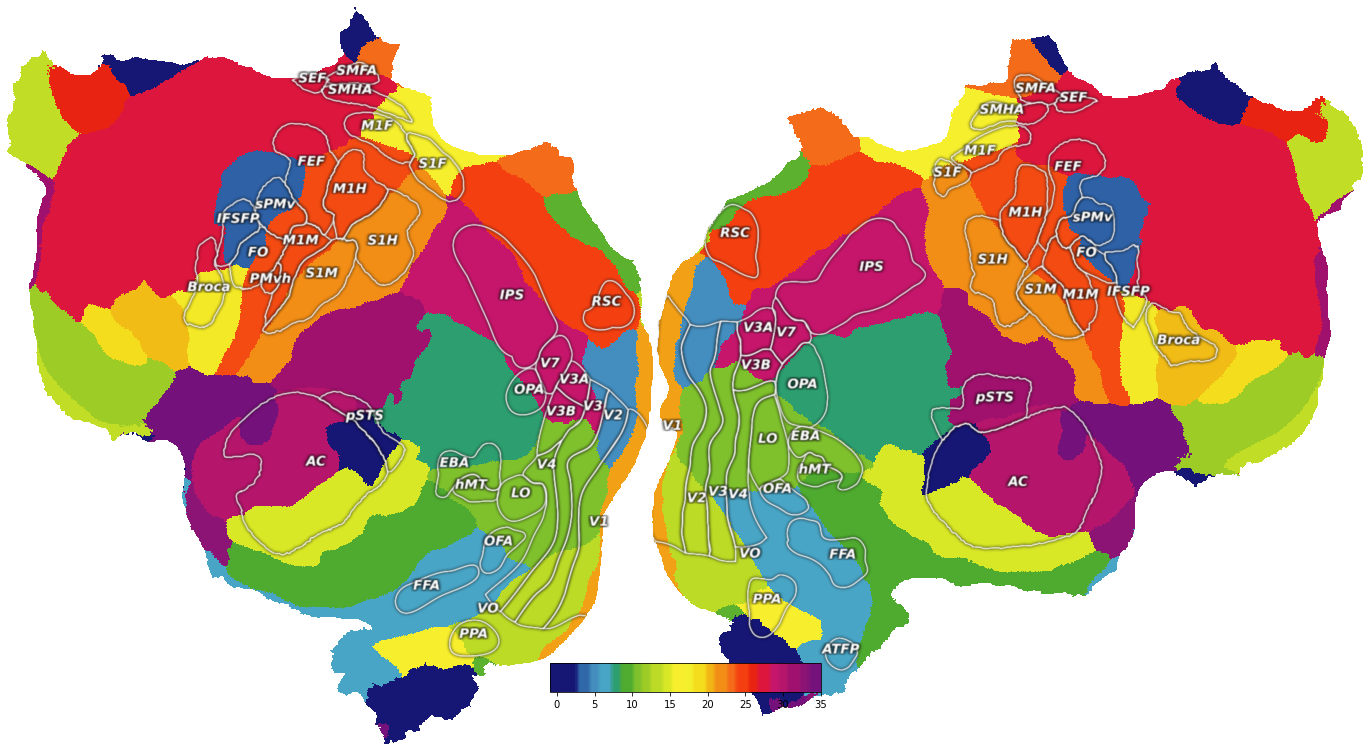

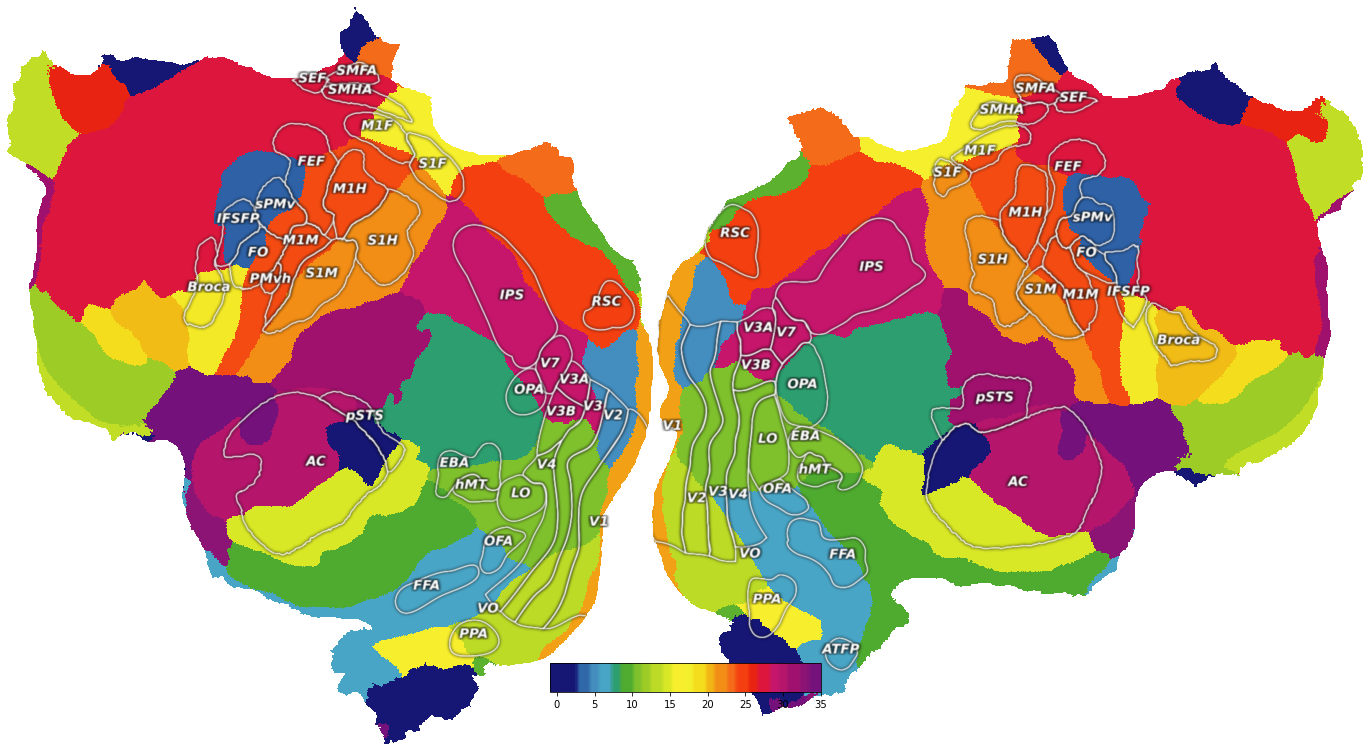

In [4]:
# plot vertices

cortex.quickshow(cortex.Vertex(np.hstack([lab_l, lab_r]), subject, cmap='J4'))

In [20]:
# get voxels

mask = cortex.db.get_mask(subject, xfm)
Mapper = cortex.get_mapper(subject, xfm, 'line_nearest')
Map_l = Mapper.masks[0][:, mask.ravel()]
Map_r = Mapper.masks[1][:, mask.ravel()]

roi_voxels = {}

for lm in range(len(names)):
    vert_l = set((lab_l==lm).nonzero()[0].tolist())
    vert_r = set((lab_r==lm).nonzero()[0].tolist())
    vox_l = Map_l[list(vert_l), :].nonzero()[1]
    vox_r = Map_r[list(vert_r), :].nonzero()[1]
    roi_voxels[names[lm]] = np.sort(list(set(map(int, np.hstack([vox_r, vox_l])))))

In [22]:
# voxels in superiorfrontal
roi_voxels['superiorfrontal']

array([42597, 42598, 42599, ..., 93601, 93602, 93625])

Generating a flatmap cache


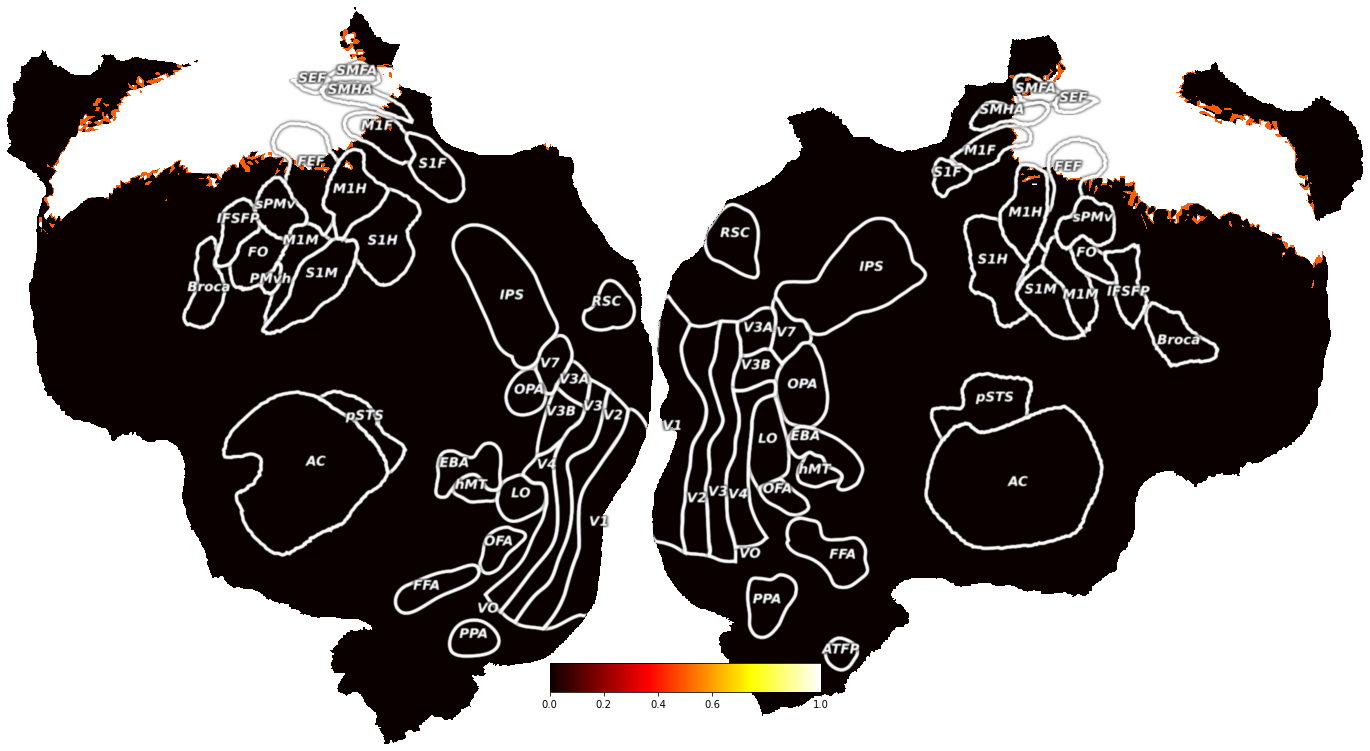

In [25]:
# plot roi voxels
fm = np.zeros(np.sum(mask))
fm[roi_voxels['superiorfrontal']] = 1
data_3d = cortex.unmask(mask, fm)
data_vol = cortex.Volume(data_3d, subject, xfm, cmap='hot', vmin=0, vmax=1)
cortex.quickshow(data_vol, with_labels=True, with_rois=True, linewidth=5, thick=2);